## Simple Linear Regression

A Linear Regression is a linear approximation of a causal relationship between two or more variables.

Equation: **Y = mx + c**
where,
* m = Coefficient or slope
* x = independent variable or input
* c = intercept or constant
* y = dependent variable or target

In [1]:
# Import relevant libraries
import numpy as np  # Mathematical operational tool
import pandas as pd # Data Manipulating tool
import matplotlib.pyplot as plt  # Data Visuilaztion tool
# enabling the plot visuilazing in jupyter notebook(optional,plt.show() - can be used instead of this)
%matplotlib inline

In [2]:
# Loading the data
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
raw_data = pd.read_csv(url)

#### Exploring the Data

In [3]:
# top 5 data
raw_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Looking the data info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Rows and columns
print(f'Number of Rows in Data {raw_data.shape[0]}\nNumber of Columns in Data {raw_data.shape[1]}')

Number of Rows in Data 25
Number of Columns in Data 2


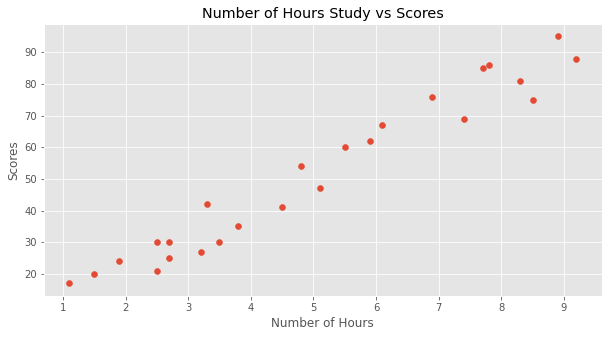

In [6]:
# Looking for relations between different variables in data through visuilzation
plt.figure(figsize=(10,5)) # Changing the size of plotting figure
plt.style.use('ggplot')
plt.title('Number of Hours Study vs Scores')
plt.xlabel('Number of Hours')
plt.ylabel('Scores')
plt.scatter(data=raw_data,x='Hours',y='Scores')

From graph it can be easily insight that hours and scores are  have positive Coreletaion i.e. with increasing in one, also means increase in others.

In [7]:
# Creating the check point 
df = raw_data.copy()

## Creating our Linear Regression Model

In [8]:
# Declaring the variable
x = df.iloc[:,:-1] # inputs or independent variables
y = df.iloc[:,-1] # outputs or dependents variables

In [9]:
# Splitting the data in train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [10]:
# creating our simple linear regression model
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()

In [11]:
# Training our model on train data
linearReg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Coeffiecient and intercept of regression line
print(f'Coeffiecient of linear Regression line {linearReg.coef_[0]:0.2f}\nIntercept of Regression line {linearReg.intercept_:0.2f}')

Coeffiecient of linear Regression line 9.66
Intercept of Regression line 2.89


Those who even didn't study for a an hour will get the scores of 2.89

In [13]:
# The Regression Line equation for training data
yhat = x_train*linearReg.coef_ + linearReg.intercept_

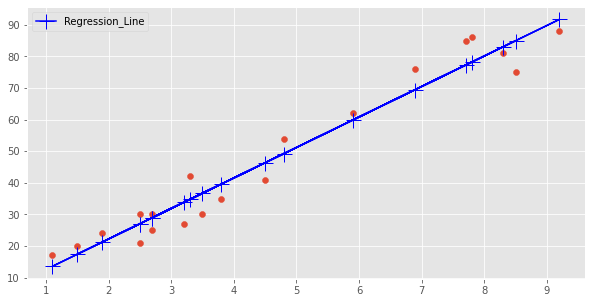

In [14]:
# Plotting the regression line on train data
plt.figure(figsize=(10,5))
plt.scatter(x_train,y_train)
plt.plot(x_train,yhat, label='Regression_Line',c = 'b', marker='+',markersize=15)
plt.legend()

In [15]:
from sklearn.metrics import mean_absolute_error,r2_score

In [16]:
# Accuracy in Training the data on train data
print(f'Mean Absolute Error : {mean_absolute_error(y_train,yhat):.2f}')
print(f'{r2_score(y_train,yhat)*100:.2f}% variability of data explain by our model')

Mean Absolute Error : 4.91
95.28% variability of data explain by our model


## Making Prediction

In [17]:
# making prediction on test data
y_pred = linearReg.predict(x_test)
predictions = pd.DataFrame()
predictions['Actual Data'] = y_test
predictions['Predicted Data'] = y_pred
predictions

,Actual Data,Predicted Data
19,69,74.340065
7,60,55.994958
18,67,61.788150
1,47,52.132830
15,95,88.823045


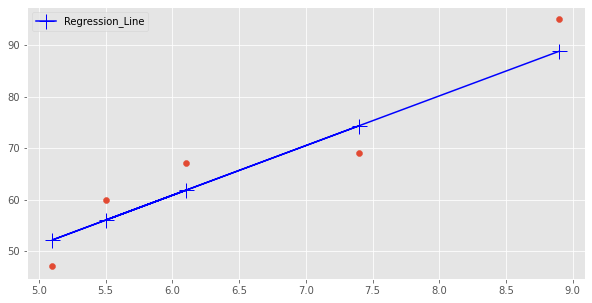

In [18]:
# Plotting the regression line on test data
plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred, label='Regression_Line',c = 'b', marker='+',markersize=15)
plt.legend()

In [19]:
# Accuracy in Training the data on test data
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred):.2f}')
print(f'{r2_score(y_test,y_pred)*100:.2f}% variability of data explain by our model')

Mean Absolute Error : 5.17
88.97% variability of data explain by our model


## Task/Questions
**What will be the predicted score if a student study for 9.25 hrs in a day?**

In [20]:
print(f'Student who study for 9.25hrs,\nin a day will be get {linearReg.predict([[9.25]])[0]:.2f} Scores')

Student who study for 9.25hrs,
in a day will be get 92.20 Scores
